## MSIN1067 Data Visualisation Group Coursework
### — Group 18

### 1 SUICIDE AND ITS POTENTIAL FACTORS

### 1.1 Background Information

The World Health Organisation (WHO) estimates that each year approximately one million people die from suicide, which represents a global mortality rate of 16 people per 100,000 or one death every 40 seconds. 

The WHO further reports that, in the last 45 years suicide rates have increased by 60% worldwide. Suicide is now among the three leading causes of death among those aged 15-44 (male and female). Suicide attempts are up to 20 times more frequent than completed suicides. Although suicide rates have traditionally been highest amongst elderly males, rates among young people have been increasing to such an extent that they are now the group at highest risk in a third of all countries.Mental health disorders (particularly depression and substance abuse) are associated with more than 90% of all cases of suicide.

However, suicide results from many complex sociocultural factors and is more likely to occur during periods of socioeconomic, family and individual crisis (e.g. loss of a loved one, unemployment, sexual orientation, difficulties with developing one's identity, disassociation from one's community or other social/belief group, and honour).

The WHO also states that, in Europe, particularly Eastern Europe, the highest suicide rates are reported for both men and women. The Eastern Mediterranean Region and Central Asia republics have the lowest suicide rates. Nearly 30% of all suicides worldwide occur in India and China. Suicides globally by age are as follows: 55% are aged between 15 to 44 years and 45% are aged 45 years and over. Youth suicide is increasing at the greatest rate.

The reason we select such a heavy and sensitive topic is that we realized that it is not enough to describe the consequences of suicide in the quantitively way. It's easy to describe the number of deaths, the suicide way, the suicide rate and the age of the deceased with several numbers. However, we need to realize that behind each number, there is a life connected with many relatives and friends. The death is a huge loss for his/her family, friends, and may leave a huge trauma to the whole society. Therefore, how to present reliable information in an appropriate way to draw people’s attention to the serious situation, while maintaining respect for the deceased persons, is a big challenge for us. 

We expect that showing the age, gender, nationality, suicide way and other characteristics of each suicide in the report; extracting effective information for further analysis. We want to find the connections in each case and look for any possible way to intervene before a tragedy happens. 

### 1.2 Setup

In [1]:
# Ignore the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# Importing various modules for data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [3]:
# Ensure MatplotLib plots figures inline
%matplotlib inline  
style.use('seaborn-dark')
sns.set(style='whitegrid', color_codes=True)

In [4]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [5]:
# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
from plotly import tools
import plotly.figure_factory as ff
import plotly.express as px

from bubbly.bubbly import bubbleplot

import plotly.tools as tls
import squarify
from numpy import array
from matplotlib import cm
import dabl

from plotly.subplots import make_subplots
import plotly.graph_objects as go

### 2 Data Cleaning

### 2.1 Loading the main dataset

In [6]:
#original dataset
df_or = pd.read_csv('./suicide.csv')
#update the suicide rates
update = pd.read_csv('./suicide-death-rates.csv')
update = update.rename({'Entity':'country','Year':'year'}, axis = 1)

In [7]:
#merge these two datasets
df = pd.merge(df_or,update,on=['country','year'],how ='right')

In [8]:
df

country  year  sex  age  suicides_no  population  \
0      Afghanistan  1990  NaN  NaN          NaN         NaN   
1      Afghanistan  1991  NaN  NaN          NaN         NaN   
2      Afghanistan  1992  NaN  NaN          NaN         NaN   
3      Afghanistan  1993  NaN  NaN          NaN         NaN   
4      Afghanistan  1994  NaN  NaN          NaN         NaN   
...            ...   ...  ...  ...          ...         ...   
27850     Zimbabwe  2013  NaN  NaN          NaN         NaN   
27851     Zimbabwe  2014  NaN  NaN          NaN         NaN   
27852     Zimbabwe  2015  NaN  NaN          NaN         NaN   
27853     Zimbabwe  2016  NaN  NaN          NaN         NaN   
27854     Zimbabwe  2017  NaN  NaN          NaN         NaN   

       suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0                    NaN          NaN           NaN                NaN   
1                    NaN          NaN           NaN                NaN   
2                    NaN          NaN           NaN                NaN   
3                    NaN          NaN           NaN                NaN   
4                    NaN          NaN           NaN                NaN   
...                  ...          ...           ...                ...   
27850                NaN          NaN           NaN                NaN   
27851                NaN          NaN           NaN                NaN   
27852                NaN          NaN           NaN                NaN   
27853                NaN          NaN           NaN                NaN   
27854                NaN          NaN           NaN                NaN   

       gdp_per_capita ($) generation Code  suicide rates  
0                     NaN        NaN  AFG      10.318504  
1                     NaN        NaN  AFG      10.327010  
2                     NaN        NaN  AFG      10.271411  
3                     NaN        NaN  AFG      10.376123  
4                     NaN        NaN  AFG      10.575915  
...                   ...        ...  ...            ...  
27850                 NaN        NaN  ZWE      28.361200  
27851                 NaN        NaN  ZWE      27.605547  
27852                 NaN        NaN  ZWE      27.197061  
27853                 NaN        NaN  ZWE      26.839591  
27854                 NaN        NaN  ZWE      26.391769  

[27855 rows x 14 columns]

<font color='grey'>**Description of Variables**</font>

| Variable | Description |
|--- |---|
|country|country name|
|year|year (from 1985 to 2016)|
|sex|gender (male, female)|
|age|age|
|suicides_no|number of suicides|
|population|population in the country|
|suicides/100k pop|number of suicides per 100k pop|
|country-year|combination of country and year|
|HDI for year|Human Development Index for year|
|gdp_for_year|Gross Domestic Product for year|
|gdp_per_capita|Gross Domestic Product per capita|
|generation|all of the people born and living at about the same time|
|code|the unique code that represents the country|
|suicide rates|updated suicide rates per 100k pop|

#This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### 2.2 Add in external datasets

#### 2.2.1 Poverty

In [9]:
# 1. poverty
poverty = pd.read_csv('./poverty.csv')
poverty['Year'] = poverty['Year'].astype(float)
poverty = poverty[['Year','Country Name','Country Code','Gini index (World Bank estimate) [SI.POV.GINI]']].copy()
df1 = pd.merge(df, poverty, right_on = ['Year', 'Country Name'], left_on = ['year', 'country'], how='left')

#### 2.2.2 Jobs-Unemployment Rate

In [10]:
# 2. unemployment rate
jobs = pd.read_csv('./jobs.csv')
jobs.columns.to_list()
jobs = jobs[['Time','Country Name','Country Code',
             'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]']].copy()
jobs = jobs.rename(columns = {'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]':'Total Unemployment'})
jobs['Time'] = jobs['Time'].astype(float)
df2 = pd.merge(df1, jobs, left_on = ['year', 'country'], right_on = ['Time','Country Name'],how='left' )

#### 2.2.3 Jobs-Hours worked

In [11]:
# 3. Hours worked
hours_worked= pd.read_csv('./Hours worked.csv')
hours_worked.head(10)

hours_worked['TIME'] = hours_worked['TIME'].astype(float)

#there is no country name in this dataset, we need to match it.
code_match = jobs[['Country Name','Country Code']].copy()
hours_cleaned = pd.merge(hours_worked, code_match, left_on = 'LOCATION', right_on = 'Country Code', how = 'left')
hours_cleaned = hours_cleaned.drop_duplicates()
df3 = pd.merge(df2, hours_cleaned, left_on = ['year', 'country'], right_on = ['TIME','Country Name'], how = 'left')
# value = hours/worker

#### 2.2.4 Education 

In [12]:
# 4. education
education = pd.read_csv('./education.csv')
edu_cleaned = education[['Time','Country Name','Country Code',
              'Completion rate, upper secondary education, fourth quintile, both sexes (%) [UIS.CR.3.Q4]']].copy()
edu_cleaned2 = edu_cleaned.rename(columns = {'Completion rate, upper secondary education, fourth quintile, both sexes (%) [UIS.CR.3.Q4]':'Completion Rate'})
df4 = pd.merge(df3, edu_cleaned2, left_on = ['year', 'country'], right_on = ['Time','Country Name'], how = 'left')

In [13]:
# drop the unnecessary columns
df5 = df4[['country','year','sex','age','suicides_no','population','suicides/100k pop','country-year','HDI for year',
 ' gdp_for_year ($) ','gdp_per_capita ($)','generation','Gini index (World Bank estimate) [SI.POV.GINI]',
 'Total Unemployment','Value','Completion Rate','suicide rates','Code']].copy()

df5 = df5.rename(columns = {'Gini index (World Bank estimate) [SI.POV.GINI]':'Gini index','Value':'hours worked',
                           'Completion Rate':'school completion rate'})
df5

country  year  sex  age  suicides_no  population  \
0      Afghanistan  1990  NaN  NaN          NaN         NaN   
1      Afghanistan  1991  NaN  NaN          NaN         NaN   
2      Afghanistan  1992  NaN  NaN          NaN         NaN   
3      Afghanistan  1993  NaN  NaN          NaN         NaN   
4      Afghanistan  1994  NaN  NaN          NaN         NaN   
...            ...   ...  ...  ...          ...         ...   
27850     Zimbabwe  2013  NaN  NaN          NaN         NaN   
27851     Zimbabwe  2014  NaN  NaN          NaN         NaN   
27852     Zimbabwe  2015  NaN  NaN          NaN         NaN   
27853     Zimbabwe  2016  NaN  NaN          NaN         NaN   
27854     Zimbabwe  2017  NaN  NaN          NaN         NaN   

       suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0                    NaN          NaN           NaN                NaN   
1                    NaN          NaN           NaN                NaN   
2                    NaN          NaN           NaN                NaN   
3                    NaN          NaN           NaN                NaN   
4                    NaN          NaN           NaN                NaN   
...                  ...          ...           ...                ...   
27850                NaN          NaN           NaN                NaN   
27851                NaN          NaN           NaN                NaN   
27852                NaN          NaN           NaN                NaN   
27853                NaN          NaN           NaN                NaN   
27854                NaN          NaN           NaN                NaN   

       gdp_per_capita ($) generation Gini index Total Unemployment  \
0                     NaN        NaN        NaN                NaN   
1                     NaN        NaN        NaN                NaN   
2                     NaN        NaN        NaN                NaN   
3                     NaN        NaN        NaN                NaN   
4                     NaN        NaN        NaN                NaN   
...                   ...        ...        ...                ...   
27850                 NaN        NaN         ..        5.204999924   
27851                 NaN        NaN         ..        5.135000229   
27852                 NaN        NaN         ..        5.085999966   
27853                 NaN        NaN         ..        5.046000004   
27854                 NaN        NaN       44.3                NaN   

       hours worked school completion rate  suicide rates Code  
0               NaN                    NaN      10.318504  AFG  
1               NaN                    NaN      10.327010  AFG  
2               NaN                    NaN      10.271411  AFG  
3               NaN                    NaN      10.376123  AFG  
4               NaN                    NaN      10.575915  AFG  
...             ...                    ...            ...  ...  
27850           NaN                    NaN      28.361200  ZWE  
27851           NaN                    NaN      27.605547  ZWE  
27852           NaN                    NaN      27.197061  ZWE  
27853           NaN                    NaN      26.839591  ZWE  
27854           NaN                     ..      26.391769  ZWE  

[27855 rows x 18 columns]

#### 2.2.5 Gender Inequality Index

In [14]:
# 5. gender inequality index
gender = pd.read_csv('./gender.csv')
gender = gender[['Country','1995','2000','2005','2010','2011','2012','2013','2014',
                 '2015','2016','2017','2018','2019']].copy()
year_list = ['1995','2000','2005','2010','2011','2012','2013','2014',
             '2015','2016','2017','2018','2019']

gender['to explode'] = ''
for i in range(0,206):
    gender['to explode'].iloc[i]=year_list
gender2 = gender.explode('to explode')
gender2['value'] = ''

In [15]:
for i in range(0,2678):
    year = gender2['to explode'].iloc[i]
    value = gender2[year].iloc[i]
    if value == '..':
        gender2['value'].iloc[i] = 0
    else:
        gender2['value'].iloc[i] = value

In [16]:
gender3 = gender2[['Country','to explode','value']].copy()
gender3 = gender3.rename(columns = {'to explode':'year','value':'gender inequality index'})
gender3['gender inequality index'] = gender3['gender inequality index'].astype(float)
gender3['year'] = gender3['year'].astype(float)

In [17]:
for i in range(0,2678):
    gender3['Country'].iloc[i] = gender3['Country'].iloc[i].strip(' ')
df6 = pd.merge(df5, gender3, left_on = ['year', 'country'], right_on = ['year','Country'], how = 'left')
df6.columns.to_list()

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation',
 'Gini index',
 'Total Unemployment',
 'hours worked',
 'school completion rate',
 'suicide rates',
 'Code',
 'Country',
 'gender inequality index']

#### 2.3 Final Dataset

In [18]:
# Final dataset used in the project

final_df = df6[['country','Code','year','sex','age','suicides_no','suicide rates','population','suicides/100k pop',
               'country-year','HDI for year',' gdp_for_year ($) ','gdp_per_capita ($)','generation','Gini index',
               'Total Unemployment','hours worked','school completion rate','gender inequality index']].copy()
final_df

country Code  year  sex  age  suicides_no  suicide rates  \
0      Afghanistan  AFG  1990  NaN  NaN          NaN      10.318504   
1      Afghanistan  AFG  1991  NaN  NaN          NaN      10.327010   
2      Afghanistan  AFG  1992  NaN  NaN          NaN      10.271411   
3      Afghanistan  AFG  1993  NaN  NaN          NaN      10.376123   
4      Afghanistan  AFG  1994  NaN  NaN          NaN      10.575915   
...            ...  ...   ...  ...  ...          ...            ...   
27850     Zimbabwe  ZWE  2013  NaN  NaN          NaN      28.361200   
27851     Zimbabwe  ZWE  2014  NaN  NaN          NaN      27.605547   
27852     Zimbabwe  ZWE  2015  NaN  NaN          NaN      27.197061   
27853     Zimbabwe  ZWE  2016  NaN  NaN          NaN      26.839591   
27854     Zimbabwe  ZWE  2017  NaN  NaN          NaN      26.391769   

       population  suicides/100k pop country-year  HDI for year  \
0             NaN                NaN          NaN           NaN   
1             NaN                NaN          NaN           NaN   
2             NaN                NaN          NaN           NaN   
3             NaN                NaN          NaN           NaN   
4             NaN                NaN          NaN           NaN   
...           ...                ...          ...           ...   
27850         NaN                NaN          NaN           NaN   
27851         NaN                NaN          NaN           NaN   
27852         NaN                NaN          NaN           NaN   
27853         NaN                NaN          NaN           NaN   
27854         NaN                NaN          NaN           NaN   

       gdp_for_year ($)   gdp_per_capita ($) generation Gini index  \
0                    NaN                 NaN        NaN        NaN   
1                    NaN                 NaN        NaN        NaN   
2                    NaN                 NaN        NaN        NaN   
3                    NaN                 NaN        NaN        NaN   
4                    NaN                 NaN        NaN        NaN   
...                  ...                 ...        ...        ...   
27850                NaN                 NaN        NaN         ..   
27851                NaN                 NaN        NaN         ..   
27852                NaN                 NaN        NaN         ..   
27853                NaN                 NaN        NaN         ..   
27854                NaN                 NaN        NaN       44.3   

      Total Unemployment  hours worked school completion rate  \
0                    NaN           NaN                    NaN   
1                    NaN           NaN                    NaN   
2                    NaN           NaN                    NaN   
3                    NaN           NaN                    NaN   
4                    NaN           NaN                    NaN   
...                  ...           ...                    ...   
27850        5.204999924           NaN                    NaN   
27851        5.135000229           NaN                    NaN   
27852        5.085999966           NaN                    NaN   
27853        5.046000004           NaN                    NaN   
27854                NaN           NaN                     ..   

       gender inequality index  
0                          NaN  
1                          NaN  
2                          NaN  
3                          NaN  
4                          NaN  
...                        ...  
27850                    0.551  
27851                    0.548  
27852                    0.546  
27853                    0.541  
27854                    0.533  

[27855 rows x 19 columns]

### 3  Exploratory Data Analysis (EDA)

In [19]:
# Create a replica of final dataset
dataset = final_df.copy()
# Change names of some columns in 'dataset'
dataset = dataset.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age',
                                  'suicides_no':'SuicidesNo','population':'Population',
                                  'suicides/100k pop':'Suicides100kPop','country-year':'CountryYear',
                                  'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney',
                                  'gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation',
                                  'Gini index':'Gini_index','Total Unemployment':'Unemployment',
                                  'hours worked':'hours_worked','school completion rate':'completion_rate',
                                  'gender inequality index':'gender_inequality_index'})

In [20]:
# List summary statistics of all numerical variables
dataset.describe()

Year    SuicidesNo  suicide rates    Population  \
count  27855.000000  23334.000000   27855.000000  2.333400e+04   
mean    2003.111973    198.956930      12.107179  1.753682e+06   
std        7.457098    660.266809       7.599272  3.823170e+06   
min     1990.000000      0.000000       1.526792  2.780000e+02   
25%     1997.000000      3.000000       6.643181  1.057992e+05   
50%     2003.000000     25.000000      10.773089  4.301040e+05   
75%     2009.000000    121.000000      15.096205  1.420838e+06   
max     2017.000000  11767.000000      98.831696  4.380521e+07   

       Suicides100kPop   HDIForYear  GdpPerCapitalMoney  hours_worked  \
count     23334.000000  7728.000000        23334.000000   9546.000000   
mean         12.462495     0.780943        18206.608640   1742.201653   
std          18.215378     0.092678        19977.056002    228.258532   
min           0.000000     0.483000          251.000000   1381.000000   
25%           1.010000     0.715750         3658.000000   1575.000000   
50%           5.830000     0.783000        10290.000000   1727.000000   
75%          16.210000     0.859000        27655.000000   1856.000000   
max         204.920000     0.944000       126352.000000   2422.000000   

       gender_inequality_index  
count              9375.000000  
mean                  0.254762  
std                   0.181715  
min                   0.000000  
25%                   0.103000  
50%                   0.231000  
75%                   0.406000  
max                   0.819000

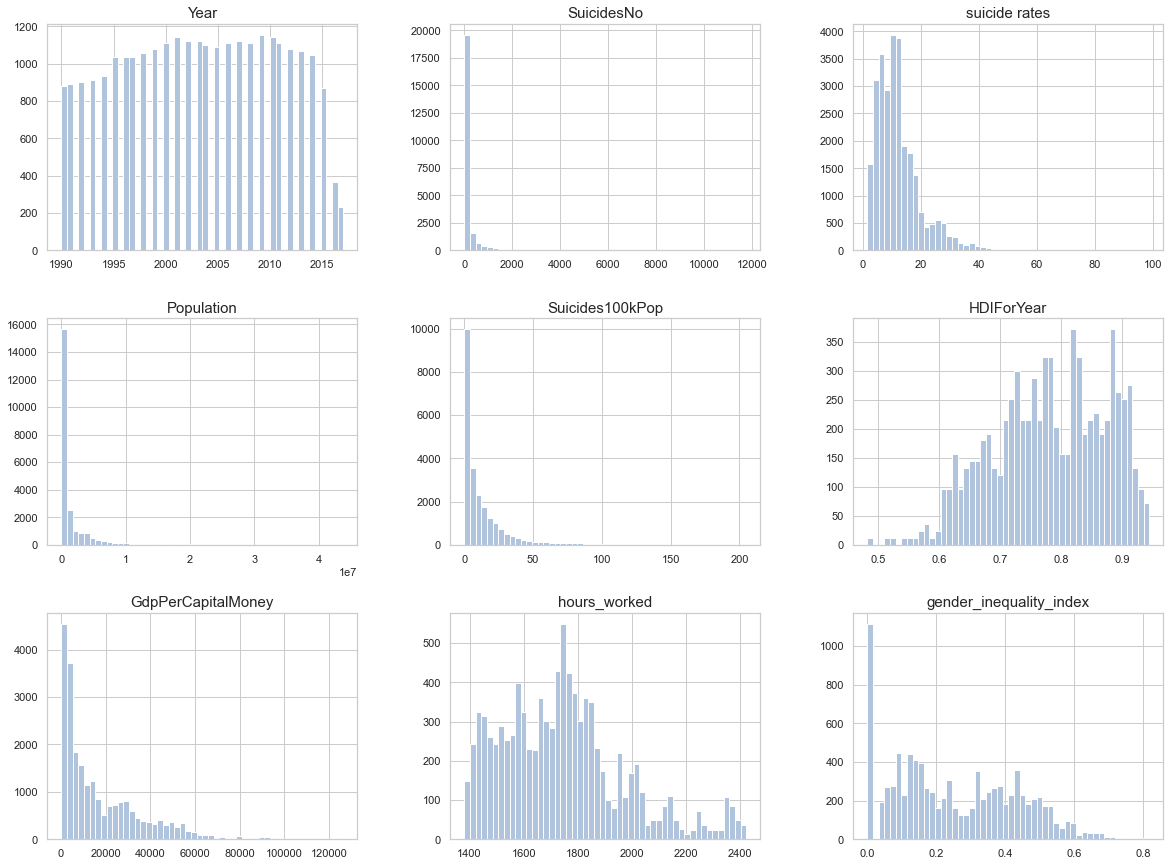

In [21]:
# Plot a histogram of each numerical attribute
fig = dataset.hist(bins=50, figsize=(20,15),color = 'lightsteelblue')
[x.title.set_size(15) for x in fig.ravel()]
plt.show()

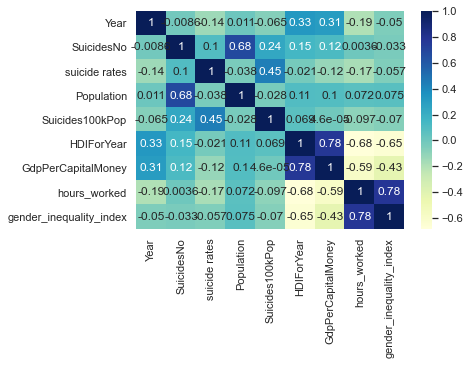

In [22]:
# Draw the heatmap
sns.heatmap(dataset.corr(),cmap='YlGnBu',annot=True)
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

### 4 Data Visualization

### Section 1. Overall trends

#### 4.1.1 Overall trends of average suicide rate variation by year

In [23]:
from bokeh.plotting import figure, output_notebook, show

In [24]:
from bokeh.plotting import figure, output_file, save

In [25]:
#check the number of years covered for each country
list_country = df_or['country'].value_counts().index.to_list()
country_check = pd.DataFrame(columns = ['country','start_year','end_year','index'])
country_check['index'] = range(1,101)
for i in range(0,100):
    country = list_country[i]
    country_check['country'].iloc[i] = country
    df_inter = df_or[df_or['country'] == country].copy()
    year_min = df_inter['year'].min()
    country_check['start_year'].iloc[i] = year_min
    year_max = df_inter['year'].max()
    country_check['end_year'].iloc[i] = year_max

In [26]:
#select the countries that meet the criteria
country_check = country_check[country_check['start_year']<=1990].copy()
country_check = country_check[country_check['end_year']>=2015].copy()
list_country_useful = country_check['country'].to_list()
#subset the original dataset to be the countries that meets the criteria
df_line = df_or[df_or['country'].isin(list_country_useful)].copy()
line = pd.DataFrame(df_line.groupby('year')['suicides_no'].sum()).reset_index()

In [27]:
line = line[line['year'] <=2015].copy()
line = line[line['year'] >=1990].copy()
line['Notes'] = 'N/A'
line['suicides_no'] = line['suicides_no']/1000

In [28]:
#original
#fig, ax = plt.subplots()
fig = figure(width=800, height=400)
fig.title.text = "Global Suicide Trend between 1990 and 2015"
fig.line(line['year'], line['suicides_no'], 
         line_alpha=0.8,
         legend_label='#of suicide', 
         line_width=2)
fig.circle(line['year'], line['suicides_no'], color='lightsteelblue', fill_color='white', size=5)
fig.legend.location = 'bottom_right'
fig.legend.click_policy = 'hide'

from bokeh.models.tools import HoverTool
fig.add_tools(HoverTool(
    tooltips=[
        ('Year','@x'),
        ('# of suicides(in thousand)', '@y'),
]))
output_file("updated.html")
save(fig)
show(fig)

In [61]:
# #size changed to fit webpage

# fig = figure(width=3000, height=1000)

# fig.axis.axis_label_text_font_style = 'normal'
# fig.axis.axis_label = 'lato'
# fig.axis.axis_label_text_font_size = "20pt"
# fig.axis.major_label_text_font_size = "20pt"

# fig.title.text_font_style = 'normal'
# fig.title.text_font_size = '25pt'

# fig.xaxis.axis_label="Year"
# fig.yaxis.axis_label="Number of Suicide Cases (in Thousands)"

# fig.title.text = "Global Suicide Trend between 1990 and 2015"
# fig.line(line['year'], line['suicides_no'], 
#          line_alpha=0.8,
#          legend_label='# of suicide (in thousands)', 
#          line_width=2)
# fig.circle(line['year'], line['suicides_no'], color='lightsteelblue', fill_color='white', size=5)
# fig.legend.location = 'bottom_right'
# fig.legend.click_policy = 'hide'
# fig.legend.label_text_font_size = "20pt"

# from bokeh.models.tools import HoverTool
# fig.add_tools(HoverTool(
#     tooltips=[
#         ('Year','@x'),
#         ('# of suicides(in thousand)', '@y'),
# ]))

# output_file("updated.html")
# save(fig)
# show(fig)

#### 4.1.2 Overall trends of average suicide rate viration by country

In [29]:
x = final_df[['country','Code','year','suicide rates']].copy()
x = x.rename({'country':'Country','Code':'iso_alpha','year':'Year'},axis = 1)

In [30]:
plt.rcParams['figure.figsize'] = (18, 29)
plt.style.use('ggplot')

data = px.data.gapminder()
fig = px.choropleth(x,
                    title="Suicide Rate(/100k) change between 1990 and 2017",
                    locations="iso_alpha", 
                    color="suicide rates", 
                    hover_name="Country",
                    animation_frame="Year", 
                    range_color=[0,30],
                    color_continuous_scale=[
                    # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
                    [0, "rgb(107, 174, 214)"],
                    [0.1, "rgb(107, 174, 214)"],

                    # Let values between 10-20% of the min and max of z
                    # have color rgb(20, 20, 20)
                    [0.1, "rgb(158, 202, 225)"],
                    [0.2, "rgb(158, 202, 225)"],

                    # Values between 20-30% of the min and max of z
                    # have color rgb(40, 40, 40)
                    [0.2, "rgb(198, 219, 239)"],
                    [0.3, "rgb(198, 219, 239)"],

                    [0.3, "rgb(222, 235, 247)"],
                    [0.4, "rgb(222, 235, 247)"],

                    [0.4, "rgb(247, 251, 255)"],
                    [0.5, "rgb(247, 251, 255)"],

                    [0.5, "rgb(255, 255, 255)"],
                    [0.6, "rgb(255, 255, 255)"],

                    [0.6, "rgb(217, 217, 217)"],
                    [0.7, "rgb(217, 217, 217)"],

                    [0.7, "rgb(189, 189, 189)"],
                    [0.8, "rgb(189, 189, 189)"],

                    [0.8, "rgb(150, 150, 150)"],
                    [0.9, "rgb(150, 150, 150)"],

                    [0.9, "rgb(115, 115, 115)"],
                    [1.0, "rgb(115, 115, 115)"]
                    ],
                #colorbar=dict(
                #    tick0=0,
                #    dtick=1
                #)
                    )
#fig.write_html('1. suicide trend.html')
fig.show()

### Section 2. Specific dimensions Analysis

#### 1. By Age

In [31]:
#count the number of suicides that occired in different age groups
dataset[['Age','SuicidesNo']].groupby(['Age']).agg('sum').sort_values(by = 'SuicidesNo',
                                                               ascending = False).head(10).style.background_gradient(cmap = 'Blues')

In [32]:
# Rank age groups
age_in_order = ['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'] # Customize a sequence
# Set the "Age" column to the Category data type
dataset["Age"] = dataset["Age"].astype("category")
dataset["Age"].cat.reorder_categories(age_in_order, inplace=True) # reordering of the category specified in the X sequence
dataset.sort_values("Age", inplace=True)

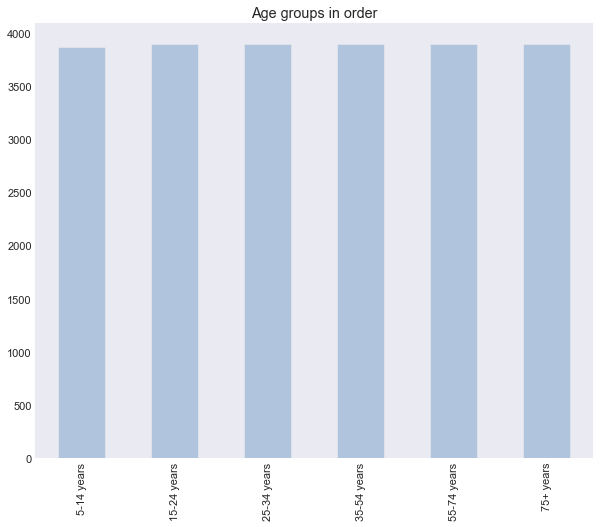

In [33]:
# value counts of age groups in order
plt.style.use('seaborn-dark')
dataset['Age'].value_counts(sort = False).plot.bar(title='Age groups in order',figsize = (10,8),color = 'lightsteelblue')

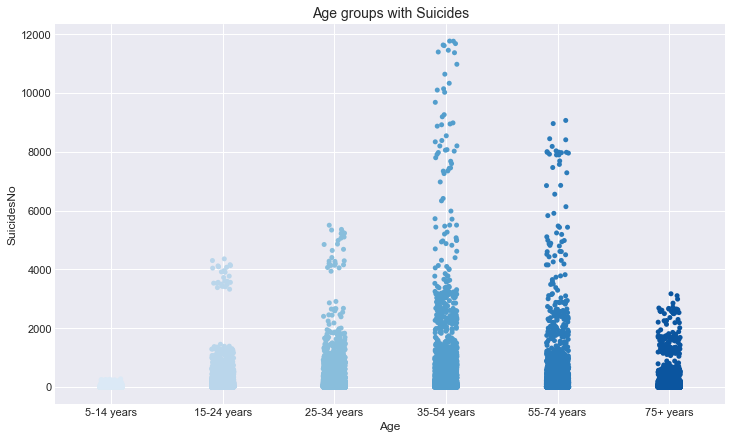

In [34]:
# Age-group with Suicides
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (12, 7)

sns.stripplot(dataset['Age'], dataset['SuicidesNo'], palette = 'Blues')
plt.title('Age groups with Suicides', fontsize = 14)
plt.grid()
plt.show()

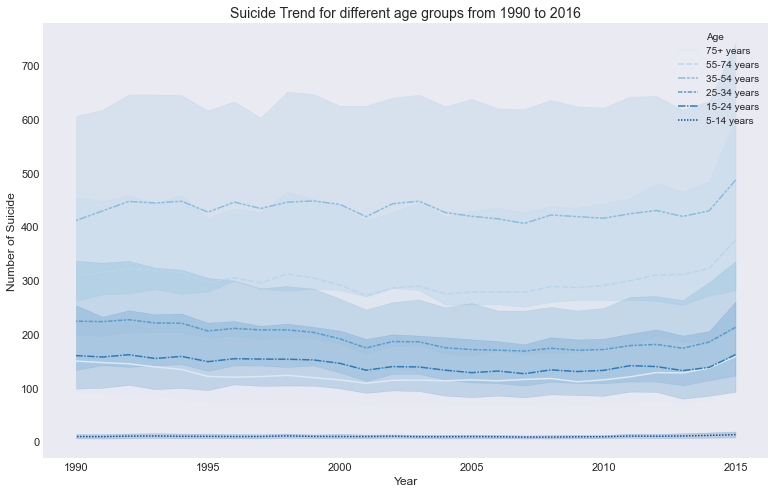

In [35]:
# Plot line graph for different age groups

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (13, 8)

suicide_trend_age_group = sns.lineplot(x="Year", y="SuicidesNo",hue="Age",hue_order = ['75+ years', '55-74 years', '35-54 years', '25-34 years', '15-24 years', '5-14 years'],
                                       style="Age", data=dataset[dataset['Year']!=2016].sort_values(by='Year',ascending=False),sort=False,palette='Blues')

suicide_trend_age_group.set(xlabel='Year', ylabel='Number of Suicide')
plt.title('Suicide Trend for different age groups from 1990 to 2016', fontsize = 14)
plt.legend(fontsize=10)
plt.show()

In [38]:
df = pd.read_csv("final_df.csv")
df_2015 = df[df.Year == 2015]
df_2015 = df_2015.drop(columns=['Population','Suicides100kPop','CountryYear','HDIForYear','GdpForYearMoney',
                      'GdpPerCapitalMoney','Generation','Gini_index','Unemployment','hours_worked','completion_rate',
                     'gender_inequality_index','Year'])
df_2015 = df_2015.groupby(by=["Country","Age"], dropna=False,as_index=False).sum()
df_2015.reset_index(inplace=True)
df_2015.head()

index              Country          Age  SuicidesNo
0      0  Antigua and Barbuda  15-24 years           0
1      1  Antigua and Barbuda  25-34 years           0
2      2  Antigua and Barbuda  35-54 years           0
3      3  Antigua and Barbuda   5-14 years           0
4      4  Antigua and Barbuda  55-74 years           1

In [39]:
df_2015.Age.unique().tolist()

['15-24 years',
 '25-34 years',
 '35-54 years',
 '5-14 years',
 '55-74 years',
 '75+ years']

In [40]:
x = ['5-14 years','15-24 years', '25-34 years', '35-54 years','55-74 years','75+ years'] # arrange in order

In [41]:
countries = df_2015.Country.unique().tolist()
data = []
for i in countries:
    name = str(i)
    y = []
    for j in x:
        y.append(int(df_2015[(df_2015['Country'] == i) & (df_2015['Age'] == j)]['SuicidesNo']))
    data.append(go.Bar(name=name, x=x, y=y, marker_color="lightsteelblue"))

In [42]:
vis = [False for i in range(len(data))]
buttons = []

for i in countries:
    vis2 = vis.copy()
    vis2[countries.index(i)] = True
    buttons.append(dict(label=str(i), method="update", args=[{"visible": vis2},{"title": str(i)}]))

In [43]:
layout = go.Layout(
    title="Suicide Count by Age Group in 2015",
    xaxis=dict(title="Age Group"),
    yaxis=dict(title="Count"
              ))

In [44]:
# Add dropdown
plot1 = go.Figure(data=data, layout=layout)
plot1.update_layout(updatemenus=[dict(active=-1,
                                      buttons=buttons,
                                      direction="down")])

plot1.update_layout(plot_bgcolor='rgb(255,255,255)')
plot1.update_layout(title='Number of Suicide Cases in 2015',
                    font=dict(family="Lato", 
#                               size=18
                             ))
                    
plot1.show()
plot1.write_html("by-country.html")

#### 2. By Country

In [36]:
# Top 10 Countries with respect to Num of Suicides
df_or[['country',
      'suicides_no']].groupby(['country']).agg('sum').sort_values(by = 'suicides_no',
                                                               ascending = False).head(10).style.background_gradient(cmap = 'Blues')

In [45]:
# Countries with least Number of Suicides
df_or[['country',
      'suicides_no']].groupby(['country']).agg('sum').sort_values(by = 'suicides_no',
                                                               ascending = True).head(10).style.background_gradient(cmap = 'Blues')

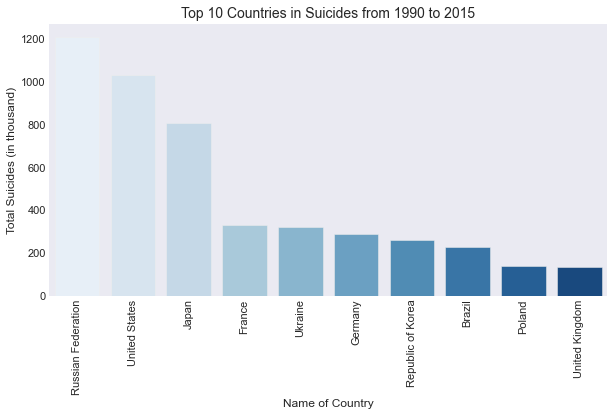

In [46]:
# visualising the different countries distribution

plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = (10, 5)

color = plt.cm.winter(np.linspace(0, 10, 100))
x = pd.DataFrame(df_or.groupby(['country'])['suicides_no'].sum().reset_index())
x.sort_values(by = ['suicides_no'], ascending = False, inplace = True)

sns.barplot(x['country'].head(10), y = x['suicides_no'].head(10)/1000, data = x, palette = 'Blues')
plt.title('Top 10 Countries in Suicides from 1990 to 2015', fontsize = 14)
plt.xlabel('Name of Country')
plt.xticks(rotation = 90)
plt.ylabel('Total Suicides (in thousand)')
plt.show()

Here, we look at the Top 10 countries based on the number of suicides per year. Russia and America are the strongest countries in terms of GDP, employment, economic growth, economy, etc., rated as one of the best places to live in the world, but ranked first in terms of suicides. 

The reasons may be unemployment, the high cost of living in these countries, or it may be due to drugs, relationship problems, family-related problems, etc.

In [47]:
suicidesNo=[]
for country in df_or.country.unique():
    suicidesNo.append(sum(df_or[df_or['country']==country].suicides_no))

In [48]:
suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(df_or.country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)
#sns.barplot(x=data.Country.unique(),y=suicidesNo) 
#plt.show()

In [49]:
data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)

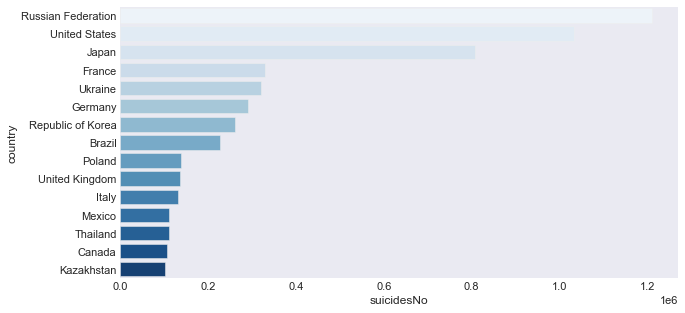

In [50]:
sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15], palette = 'Blues')
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

#### 2.1 Suicides in all countries with targeted years

In [51]:
dataset = df_or
dataset = dataset.rename({'year':'Year','country':'Country','population':'Population','suicides_no':'SuicidesNo'},axis = 1)

In [52]:
# min year and max year
min_year = min(dataset.Year)
max_year = max(dataset.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1985
Max Year : 2016


In [53]:
dfnew = dataset.copy()
dfnew

Country  Year     sex          age  SuicidesNo  Population  \
0         Albania  1987    male  15-24 years          21      312900   
1         Albania  1987    male  35-54 years          16      308000   
2         Albania  1987  female  15-24 years          14      289700   
3         Albania  1987    male    75+ years           1       21800   
4         Albania  1987    male  25-34 years           9      274300   
...           ...   ...     ...          ...         ...         ...   
27815  Uzbekistan  2014  female  35-54 years         107     3620833   
27816  Uzbekistan  2014  female    75+ years           9      348465   
27817  Uzbekistan  2014    male   5-14 years          60     2762158   
27818  Uzbekistan  2014  female   5-14 years          44     2631600   
27819  Uzbekistan  2014  female  55-74 years          21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987           NaN      2,156,624,900   
1                   5.19     Albania1987           NaN      2,156,624,900   
2                   4.83     Albania1987           NaN      2,156,624,900   
3                   4.59     Albania1987           NaN      2,156,624,900   
4                   3.28     Albania1987           NaN      2,156,624,900   
...                  ...             ...           ...                ...   
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)       generation  
0                     796     Generation X  
1                     796           Silent  
2                     796     Generation X  
3                     796  G.I. Generation  
4                     796          Boomers  
...                   ...              ...  
27815                2309     Generation X  
27816                2309           Silent  
27817                2309     Generation Z  
27818                2309     Generation Z  
27819                2309          Boomers  

[27820 rows x 12 columns]

In [54]:
dfclear = dfnew.drop(dfnew[dfnew.Year < 1990].index)
dfclear1 = dfclear.drop(dfclear[dfclear.Year > 2015].index)
dfclear1

Country  Year     sex          age  SuicidesNo  Population  \
36        Albania  1992    male  35-54 years          12      343800   
37        Albania  1992    male  15-24 years           9      263700   
38        Albania  1992    male  55-74 years           5      159500   
39        Albania  1992    male  25-34 years           7      245500   
40        Albania  1992  female  15-24 years           7      292400   
...           ...   ...     ...          ...         ...         ...   
27815  Uzbekistan  2014  female  35-54 years         107     3620833   
27816  Uzbekistan  2014  female    75+ years           9      348465   
27817  Uzbekistan  2014    male   5-14 years          60     2762158   
27818  Uzbekistan  2014  female   5-14 years          44     2631600   
27819  Uzbekistan  2014  female  55-74 years          21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
36                  3.49     Albania1992           NaN        709,452,584   
37                  3.41     Albania1992           NaN        709,452,584   
38                  3.13     Albania1992           NaN        709,452,584   
39                  2.85     Albania1992           NaN        709,452,584   
40                  2.39     Albania1992           NaN        709,452,584   
...                  ...             ...           ...                ...   
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)    generation  
36                    251       Boomers  
37                    251  Generation X  
38                    251        Silent  
39                    251       Boomers  
40                    251  Generation X  
...                   ...           ...  
27815                2309  Generation X  
27816                2309        Silent  
27817                2309  Generation Z  
27818                2309  Generation Z  
27819                2309       Boomers  

[24648 rows x 12 columns]

In [55]:
min_year = min(dfclear1.Year)
max_year = max(dfclear1.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

Min Year : 1990
Max Year : 2015


In [56]:
# define min year

data_country = dfclear1[(dfclear1['Year']==min_year)]

country_1990 = dfclear1[(dfclear1['Year']==min_year)].Country.unique()
country_1990_male=[]
country_1990_female=[]

data_country=dfclear1[(dfclear1['Year']==min_year)]

country_1990_population=[]

for country in country_1990:
    country_1990_population.append(sum(data_country[(data_country['Country']==country)].Population))

In [57]:
# define max year

data_country = dfclear1[(dfclear1['Year']==max_year)]

country_2015 = dfclear1[(dfclear1['Year']==max_year)].Country.unique()
country_2015_male=[]
country_2015_female=[]

data_country=dfclear1[(dfclear1['Year']==max_year)]

country_2015_population=[]

for country in country_2015:
    country_2015_population.append(sum(data_country[(data_country['Country']==country)].Population))  

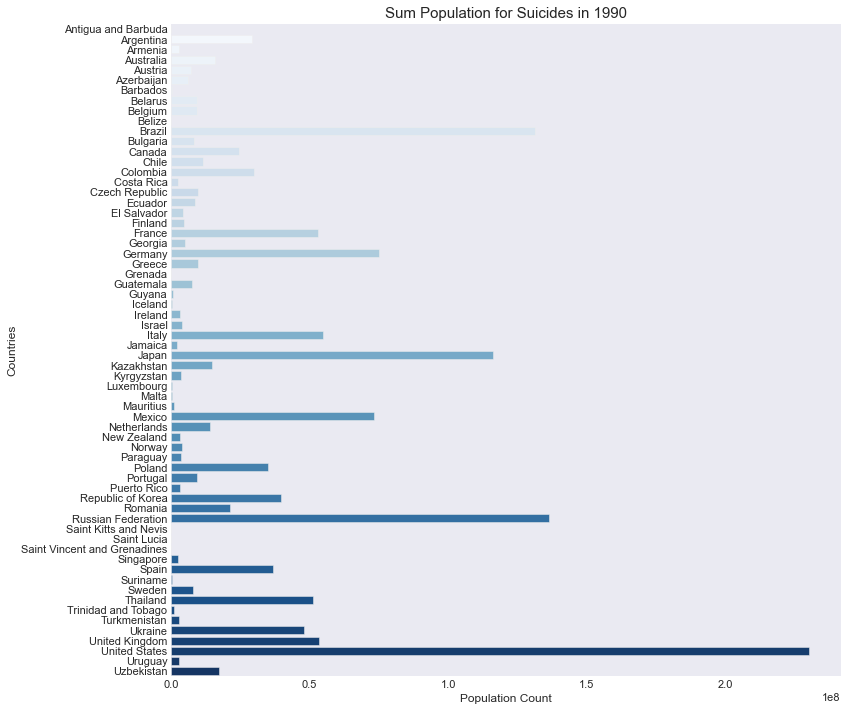

In [58]:
# find sum population every country in 1990
plt.figure(figsize=(12,12))
sns.barplot(y=country_1990,x=country_1990_population,palette='Blues')
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('Sum Population for Suicides in 1990',size=15)
plt.show()

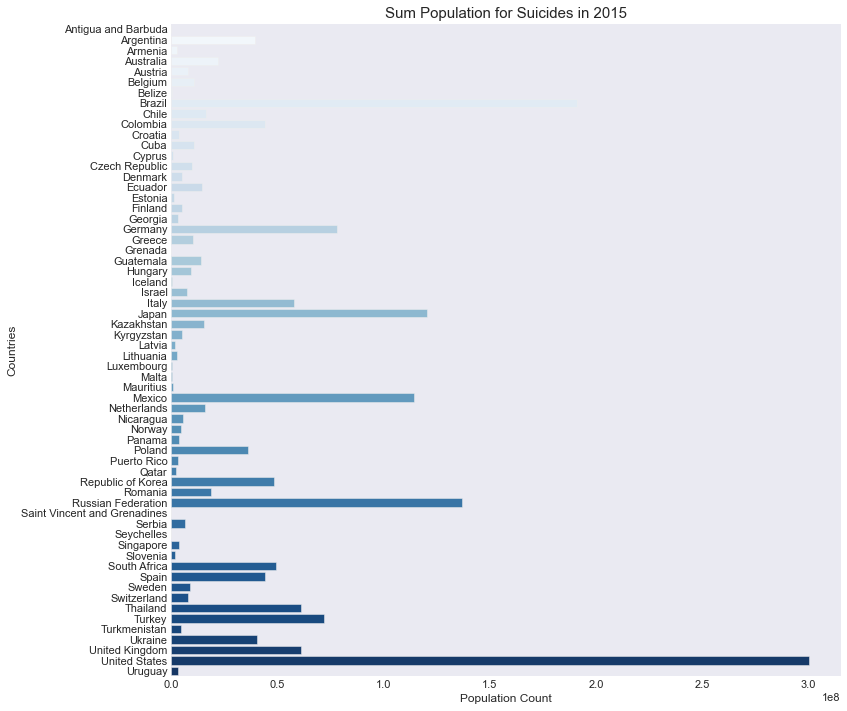

In [59]:
# find sum population every country in 2015
data_country=dfclear1[(dfclear1['Year']==max_year)]

country_2015_population=[]

for country in country_2015:
    country_2015_population.append(sum(data_country[(data_country['Country']==country)].Population)) 
    
plt.figure(figsize=(12,12))
sns.barplot(y=country_2015,x=country_2015_population, palette = 'Blues')
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('Sum Population for Suicides in 2015',size=15)
plt.show()

In [60]:
## dynamic courtry plot or wrt specific years.

#### 2.2 In specific countries

In [61]:
# looking at the Suicides in USA
dataset[dataset['Country'] == 'United States'].sample(5)

Country  Year     sex          age  SuicidesNo  Population  \
27209  United States  2015    male  55-74 years        9068    32264697   
26978  United States  1995    male   5-14 years         260    19528500   
27025  United States  1999  female  15-24 years         575    18439463   
26931  United States  1991  female   5-14 years          58    17520000   
26995  United States  1997    male  35-54 years        8920    38339600   

       suicides/100k pop       country-year  HDI for year   gdp_for_year ($)   \
27209              28.11  United States2015           NaN  18,120,714,000,000   
26978               1.33  United States1995         0.876   7,664,060,000,000   
27025               3.12  United States1999           NaN   9,660,624,000,000   
26931               0.33  United States1991           NaN   6,174,043,000,000   
26995              23.27  United States1997           NaN   8,608,515,000,000   

       gdp_per_capita ($)    generation  
27209               60387       Boomers  
26978               31518    Millenials  
27025               38072  Generation X  
26931               26503    Millenials  
26995               34644       Boomers

In [62]:
# looking at the Suicides in Russian Federation
dataset[dataset['Country'] == 'Russian Federation'].sample(5)

Country  Year     sex          age  SuicidesNo  Population  \
21226  Russian Federation  2013    male  35-54 years        8815    19484117   
21011  Russian Federation  1995    male  25-34 years        9787    10700700   
21235  Russian Federation  2013  female   5-14 years          54     6979537   
21170  Russian Federation  2008  female  55-74 years        1613    15906813   
21144  Russian Federation  2006    male  15-24 years        5319    12174930   

       suicides/100k pop            country-year  HDI for year  \
21226              45.24  Russian Federation2013           NaN   
21011              91.46  Russian Federation1995           NaN   
21235               0.77  Russian Federation2013           NaN   
21170              10.14  Russian Federation2008           NaN   
21144              43.69  Russian Federation2006           NaN   

       gdp_for_year ($)   gdp_per_capita ($)    generation  
21226  2,297,128,039,058               17052  Generation X  
21011    395,531,066,563                2844  Generation X  
21235  2,297,128,039,058               17052  Generation Z  
21170  1,660,844,408,500               12359        Silent  
21144    989,930,542,279                7313    Millenials

In [63]:
# looking at the Suicides in Russian Federation
dataset[dataset['Country'] == 'Japan'].sample(5)

Country  Year     sex          age  SuicidesNo  Population  \
13515   Japan  1997    male  15-24 years        1011     8911000   
13476   Japan  1994    male  25-34 years        1631     8250000   
13559   Japan  2001  female    75+ years        1689     6095000   
13487   Japan  1995    male  35-54 years        5507    18054500   
13566   Japan  2001    male   5-14 years          39     6295000   

       suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
13515              11.35    Japan1997           NaN  4,414,732,843,544   
13476              19.77    Japan1994           NaN  4,907,039,384,470   
13559              27.71    Japan2001           NaN  4,303,544,259,843   
13487              30.50    Japan1995         0.838  5,449,116,304,981   
13566               0.62    Japan2001           NaN  4,303,544,259,843   

       gdp_per_capita ($)    generation  
13515               37080  Generation X  
13476               41563       Boomers  
13559               35843        Silent  
13487               46043       Boomers  
13566               35843    Millenials

In [64]:
# Finding Suicide Trends according to Year
YEAR = dataset.groupby(['Country', 'Year'])['SuicidesNo'].mean()
YEAR = pd.DataFrame(YEAR)

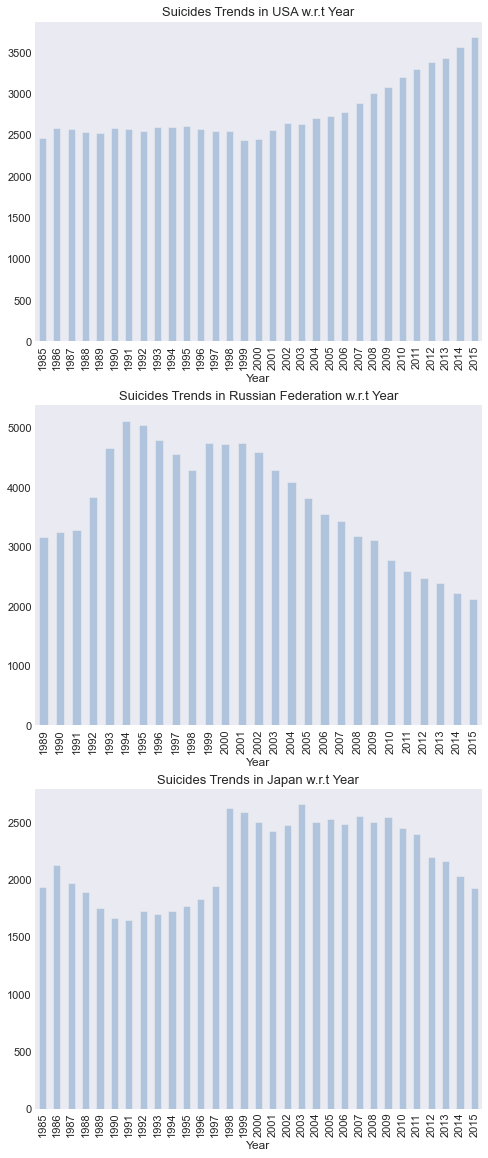

In [65]:
# looking at the suicides trends for any 3 countries
plt.rcParams['figure.figsize'] = (8, 20)

plt.subplot(3, 1, 1)
color = plt.cm.hot(np.linspace(0, 1, 10))
YEAR['SuicidesNo']['United States'].plot.bar(color = 'lightsteelblue')
plt.title('Suicides Trends in USA w.r.t Year', fontsize = 13)

plt.subplot(3, 1, 2)
color = plt.cm.spring(np.linspace(0, 1, 10))
YEAR['SuicidesNo']['Russian Federation'].plot.bar(color = 'lightsteelblue')
plt.title('Suicides Trends in Russian Federation w.r.t Year', fontsize = 13)

plt.subplot(3, 1, 3)
color = plt.cm.PuBu(np.linspace(0, 1, 10))
YEAR['SuicidesNo']['Japan'].plot.bar(color = 'lightsteelblue')
plt.title('Suicides Trends in Japan w.r.t Year', fontsize = 13)

plt.show()

In [ ]:
# #2.3 By Continent
# #R script
#Please Run in RStudio as jupyter notebook has compatiability problems 

# library(tidyverse)
# library(gganimate)

# data_csv <- read_csv("./suicide-death-rates-continent.csv")

# print(data_csv)

# suicide_data <- data_csv %>% 
#   group_by(continent, year) %>% 
#   summarise(mean_suicide_rates = mean(suicide_rates))

# print(suicide_data)


# suicide_formatted <- suicide_data %>%
#   group_by(year) %>%
#   # The * 1 makes it possible to have non-integer ranks while sliding
#   mutate(rank = rank(-mean_suicide_rates),
#          mean_suicide_rates_rel = mean_suicide_rates/mean_suicide_rates[rank==1]) %>%
#   group_by(continent) %>% 
#   filter(rank <=10) %>%
#   ungroup()


# print(suicide_formatted)


# # Animation

# anim <- ggplot(suicide_formatted, aes(rank, group = continent, fill = as.factor(continent), color = as.factor(continent))) +
#   geom_tile(aes(y = mean_suicide_rates/2, height = mean_suicide_rates, width = 0.9), alpha = 0.8, color = NA) +
#   geom_text(aes(y = 0, label = paste(continent, " ")), vjust = 0.2, hjust = 1, colour="black", size = 10) +
#   geom_text(aes(y = mean_suicide_rates, label = round(mean_suicide_rates), hjust=0), colour="black", size = 10) +
#   coord_flip(clip = "off", expand = FALSE) +
#   scale_y_continuous(labels = scales::comma) +
#   scale_x_reverse() +
#   guides(color = FALSE, fill = FALSE) +
#   theme(axis.line=element_blank(),
#         axis.text.x=element_blank(),
#         axis.text.y=element_blank(),
#         axis.ticks=element_blank(),
#         axis.title.x=element_blank(),
#         axis.title.y=element_blank(),
#         legend.position="none",
#         panel.background=element_blank(),
#         panel.border=element_blank(),
#         panel.grid.major=element_blank(),
#         panel.grid.minor=element_blank(),
#         panel.grid.major.x = element_line( size=.1, color="grey" ),
#         panel.grid.minor.x = element_line( size=.1, color="grey" ),
#         plot.title=element_text(size=40, hjust=0.5, face="bold", colour="black", vjust=-1),
#         plot.subtitle=element_text(size=30, hjust=0.5, face="italic", color="black"),
#         plot.caption =element_text(size=10, hjust=0.5, face="italic", color="black"),
#         plot.background=element_blank(),
#         plot.margin = margin(2,2, 2, 4, "cm")) +
#   transition_states(year, transition_length = 4, state_length = 1, wrap = FALSE) +
#   view_follow(fixed_x = TRUE)  +
#   labs(title = 'Suicide rates per Year : {closest_state}',  
#        subtitle  =  "By Continents") + scale_fill_brewer(palette = "Blues") 

# # For GIF
# animate(anim, 200, fps = 20,  width = 1500, height = 1000,
#         renderer = gifski_renderer("suicide26.gif"), end_pause = 15, start_pause =  15)


#### 3. By gender

In [66]:
dataset = dataset.rename({'sex':'Gender'},axis = 1)

In [67]:
# Check Num of Suicides according to Gender
dataset[['Gender','SuicidesNo']].groupby(['Gender']).agg(['min','median','max']).style.background_gradient(cmap='Blues')

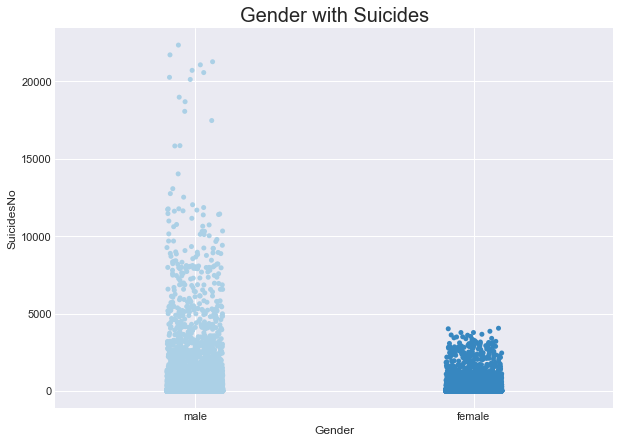

In [68]:
# Gender with Suicides
plt.rcParams['figure.figsize'] = (10, 7)

sns.stripplot(dataset['Gender'], dataset['SuicidesNo'], palette = 'Blues')
plt.title('Gender with Suicides', fontsize = 20)
plt.grid()
plt.show()

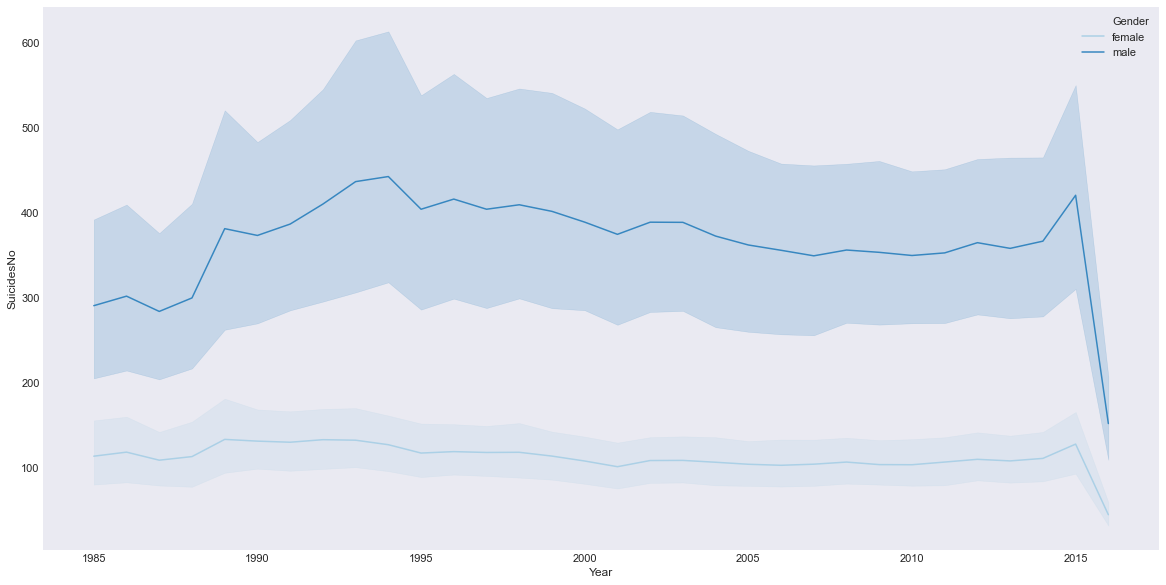

In [69]:
# Plot line graph for gender during all years
plt.rcParams['figure.figsize'] = (20, 10)
sns.lineplot(x="Year", y="SuicidesNo",
             hue="Gender", data=dataset.sort_values(by='Year',ascending=False),palette='Blues')
plt.show()

#### Global male-female suicide rates distribution

In [75]:
x = pd.read_csv('./Male-Female-Ratio-of-Suicide-Rates.csv')
x = x.rename({'Code':'iso_alpha','Entity':'Country'},axis = 1)

In [77]:
plt.rcParams['figure.figsize'] = (23, 29)
plt.style.use('ggplot')

data = px.data.gapminder()
fig = px.choropleth(x,
                    title="Suicide Rate(/100k) change between 1990 and 2017",
                    locations="iso_alpha", 
                    color="Male:female suicide ratio", 
                    hover_name="Country",
                    animation_frame="Year", 
                    range_color=[0,10],
                    color_continuous_scale=[
                    # Let first 10% (0.1) of the values have color rgb(0, 0, 0)
                    [0, "rgb(158, 202, 225)"],
                    [0.05, "rgb(158, 202, 225)"],
                    
                    [0.05, "rgb(222, 235, 247)"],
                    [0.1, "rgb(222, 235, 247)"],

                    # Let values between 10-20% of the min and max of z
                    # have color rgb(20, 20, 20)
                    [0.1, "rgb(255, 255, 255)"],
                    [0.2, "rgb(255, 255, 255)"],

                    # Values between 20-30% of the min and max of z
                    # have color rgb(40, 40, 40)
                    [0.2, "rgb(240, 240, 240)"],
                    [0.3, "rgb(240, 240, 240)"],

                    [0.3, "rgb(217, 217, 217)"],
                    [0.4, "rgb(217, 217, 217)"],

                    [0.4, "rgb(189, 189, 189)"],
                    [0.5, "rgb(189, 189, 189)"],

                    [0.5, "rgb(150, 150, 150)"],
                    [0.6, "rgb(150, 150, 150)"],

                    [0.6, "rgb(115, 115, 115)"],
                    [0.7, "rgb(115, 115, 115)"],

                    [0.7, "rgb(82, 82, 82)"],
                    [0.8, "rgb(82, 82, 82)"],

                    [0.8, "rgb(37, 37, 37)"],
                    [0.9, "rgb(37, 37, 37)"],

                    [0.9, "rgb(0, 0, 0)"],
                    [1.0, "rgb(0, 0, 0)"]
                    ],
                #colorbar=dict(
                #    tick0=0,
                #    dtick=1
                #)
                    )
#fig.write_html('2. global male female suicide rate trends.html')
fig.show()

### Section 4. External dataset variables (by country) — scatter plots

### 4.1 Poverty

- GDP
- Gini Index

In [78]:
GDP = df_or[['country','year','suicides/100k pop','gdp_per_capita ($)']].copy()
GDP_1 = GDP[GDP['year'] == 2004].copy()
GDP_2 = GDP[GDP['year'] == 2006].copy()
GDP_3 = GDP[GDP['year'] == 2008].copy()
GDP_4 = GDP[GDP['year'] == 2010].copy()
GDP_5 = GDP[GDP['year'] == 2012].copy()
GDP_6 = GDP[GDP['year'] == 2014].copy()

In [85]:
fig = make_subplots(rows=2, cols=3,shared_yaxes=True,shared_xaxes=True,
                   subplot_titles=("2004","2006", "2008",'2010','2012','2014'))
                    
fig.add_trace(
       go.Scatter(
        x=GDP_1['suicides/100k pop'],
        y=GDP_1['gdp_per_capita ($)'],
        mode="markers+text", 
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=1)

fig.add_trace(
       go.Scatter(
        x=GDP_2['suicides/100k pop'],
        y=GDP_2['gdp_per_capita ($)'],
        mode="markers+text", 
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=2)

fig.add_trace(
       go.Scatter(
        x=GDP_3['suicides/100k pop'],
        y=GDP_3['gdp_per_capita ($)'],
        mode="markers+text", 
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=3)

fig.add_trace(
       go.Scatter(
        x=GDP_4['suicides/100k pop'],
        y=GDP_4['gdp_per_capita ($)'],
        mode="markers+text", 
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=2, col=1)

fig.add_trace(
       go.Scatter(
        x=GDP_5['suicides/100k pop'],
        y=GDP_5['gdp_per_capita ($)'],
        mode="markers+text", 
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=2, col=2)

fig.add_trace(
       go.Scatter(
        x=GDP_6['suicides/100k pop'],
        y=GDP_6['gdp_per_capita ($)'],
        mode="markers+text", 
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=2, col=3)

fig.update_layout(showlegend=False,title_text="Relationship between GDP and suicide rates")
fig.update_xaxes(title_text="Suicide Rates")
fig.update_yaxes(title_text="GDP per capita")
fig.update_xaxes(range=[0, 120])
fig.update_yaxes(range=[0, 150000])
#fig.write_html('3. GDP suicide.html')

In [86]:
Gini = pd.read_csv('./economic-inequality-gini-index.csv')
x = pd.read_csv('./suicide-death-rates.csv')
Gini_scatter = pd.merge(Gini,x,on=['Entity','Year'],how = 'left')
gini_scatter = Gini_scatter.rename({'Entity':'Country','GINI index (World Bank estimate)':'gini index'},axis = 1)
gini_scatter = gini_scatter.sort_values(by=['Year'])
gini_scatter = gini_scatter[gini_scatter['Year']>=2004]
#gini_scatter = gini_scatter[gini_scatter['Year']<=2012]
gini_1 = gini_scatter[gini_scatter['Year']==2004].copy()
gini_2 = gini_scatter[gini_scatter['Year']==2006].copy()
gini_3 = gini_scatter[gini_scatter['Year']==2008].copy()
gini_4 = gini_scatter[gini_scatter['Year']==2010].copy()
gini_5 = gini_scatter[gini_scatter['Year']==2012].copy()
gini_6 = gini_scatter[gini_scatter['Year']==2014].copy()

In [87]:
fig = make_subplots(rows=2, cols=3,shared_yaxes=True,shared_xaxes=True,
                   subplot_titles=("2004","2006", "2008",'2010','2012','2014'))

fig.add_trace(
       go.Scatter(
        y=gini_1['gini index'],
        x=gini_1['suicide rates'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=1)


fig.add_trace(
    go.Scatter(
        y=gini_2['gini index'],
        x=gini_2['suicide rates'],
        mode="markers+text",
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
     row=1, col=2
)

fig.add_trace(
    go.Scatter(
        y=gini_3['gini index'],
        x=gini_3['suicide rates'],
        mode="markers+text",
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
     row=1, col=3
)

fig.add_trace(
    go.Scatter(
        y=gini_4['gini index'],
        x=gini_4['suicide rates'],
        mode="markers+text",
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
     row=2, col=1
)

fig.add_trace(
    go.Scatter(
        y=gini_5['gini index'],
        x=gini_5['suicide rates'],
        mode="markers+text",
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
     row=2, col=2
)

fig.add_trace(
    go.Scatter(
        y=gini_6['gini index'],
        x=gini_6['suicide rates'],
        mode="markers+text",
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
     row=2, col=3
)

fig.update_layout(showlegend=False,title_text="Relationship between Gini index and Suicide Rates")
fig.update_yaxes(title_text="Gini index")
fig.update_xaxes(title_text="Suicide Rates")
fig.update_xaxes(range=[0, 50])
fig.update_yaxes(range=[20, 70])

#fig.write_html('4. GINI suicide.html')

### 4.2 Mental health

In [88]:
df_mental = pd.read_csv('./suicide-rates-vs-prevalence-of-depression.csv')

In [89]:
df_mental = df_mental.rename({'Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)':'Death',
                  'Prevalence - Depressive disorders - Sex: Both - Age: Age-standardized (Rate)':'Depression',
                             'Entity':'Country'},axis=1)
df_mental = df_mental.sort_values('Year')
#df_mental = df_mental[df_mental['Year']==2015].copy() 

In [90]:
mental1 = df_mental[df_mental['Year']==2004].copy()
mental2 = df_mental[df_mental['Year']==2006].copy()
mental3 = df_mental[df_mental['Year']==2008].copy()
mental4 = df_mental[df_mental['Year']==2010].copy()
mental5 = df_mental[df_mental['Year']==2012].copy()
mental6 = df_mental[df_mental['Year']==2014].copy()

In [91]:
fig = make_subplots(rows=2, cols=3,shared_yaxes=True,shared_xaxes=True,
                   subplot_titles=("2004","2006", "2008",'2010','2012','2014'))

fig.add_trace(
       go.Scatter(
        x=mental1['Death'],
        y=mental1['Depression'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=1)

fig.add_trace(
       go.Scatter(
        x=mental2['Death'],
        y=mental2['Depression'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=2)

fig.add_trace(
       go.Scatter(
        x=mental3['Death'],
        y=mental3['Depression'],
        mode="markers+text",

        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=3)

fig.add_trace(
       go.Scatter(
        x=mental4['Death'],
        y=mental4['Depression'],
        mode="markers+text",
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=2, col=1)

fig.add_trace(
       go.Scatter(
        x=mental5['Death'],
        y=mental5['Depression'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=2, col=2)

fig.add_trace(
       go.Scatter(
        x=mental6['Death'],
        y=mental6['Depression'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=2, col=3)


fig.update_layout(showlegend=False,title_text="Relationship between depression and Suicide Rates")
fig.update_yaxes(title_text="Depression Rate")
fig.update_xaxes(title_text="Suicide Rates")
fig.update_xaxes(range=[0, 80])
fig.update_yaxes(range=[2000, 6000])
#fig.write_html('5. depression suicide.html')

### 4.3 Jobs

#### 1. Unemployment rate

In [93]:
unemployment = pd.read_csv('./unemployment-rate.csv')
unemployment = unemployment.rename({'Entity':'country','Year':'year',
                                    'Unemployment, total (% of total labor force) (modeled ILO estimate)':'ue'}, axis = 1)
UE = pd.merge(update, unemployment, on = ['country','year'],how = 'left')

In [94]:
#UE = final_df[['country','year','suicides/100k pop','Total Unemployment']].copy()
UE1 = UE[UE['year'] == 1994].copy()
UE2 = UE[UE['year'] == 1998].copy()
UE3 = UE[UE['year'] == 2002].copy()
UE4 = UE[UE['year'] == 2006].copy()
UE5 = UE[UE['year'] == 2010].copy()
UE6 = UE[UE['year'] == 2014].copy()

In [95]:
UE

country Code_x  year  suicide rates Code_y      ue
0     Afghanistan    AFG  1990      10.318504    NaN     NaN
1     Afghanistan    AFG  1991      10.327010    AFG  12.031
2     Afghanistan    AFG  1992      10.271411    AFG  10.645
3     Afghanistan    AFG  1993      10.376123    AFG  12.368
4     Afghanistan    AFG  1994      10.575915    AFG  12.299
...           ...    ...   ...            ...    ...     ...
6463     Zimbabwe    ZWE  2013      28.361200    ZWE   5.205
6464     Zimbabwe    ZWE  2014      27.605547    ZWE   5.135
6465     Zimbabwe    ZWE  2015      27.197061    ZWE   5.086
6466     Zimbabwe    ZWE  2016      26.839591    ZWE   5.046
6467     Zimbabwe    ZWE  2017      26.391769    ZWE   5.011

[6468 rows x 6 columns]

In [96]:
fig = make_subplots(rows=2, cols=3,shared_yaxes=True,shared_xaxes=True,
                   subplot_titles=("1994","1998", "2002",'2006','2010','2014'))

fig.add_trace(
       go.Scatter(
        x=UE1['suicide rates'],
        y=UE1['ue'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=1)

fig.add_trace(
       go.Scatter(
        x=UE2['suicide rates'],
        y=UE2['ue'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=2)

fig.add_trace(
       go.Scatter(
        x=UE3['suicide rates'],
        y=UE3['ue'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=3)

fig.add_trace(
       go.Scatter(
        x=UE4['suicide rates'],
        y=UE4['ue'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=2, col=1)

fig.add_trace(
       go.Scatter(
        x=UE5['suicide rates'],
        y=UE5['ue'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=2, col=2)

fig.add_trace(
       go.Scatter(
        x=UE6['suicide rates'],
        y=UE6['ue'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=2, col=3)

fig.update_layout(showlegend=False,title_text="Relationship between Unemployment and Suicide Rates")
fig.update_yaxes(title_text="Unemployment Rate")
fig.update_xaxes(title_text="Suicide Rates")
fig.update_xaxes(range=[0, 60])
fig.update_yaxes(range=[0, 50])
#fig.write_html('6. unemployment suicide.html')

#### 2. Working hours

In [97]:
wh = pd.read_csv('./annual-working-hours-vs-gdp-per-capita-pwt.csv')
wh = wh.rename({'Entity':'country','Year':'year',
                'Average annual hours worked by persons engaged (avh) (PWT 9.1 (2019))':'wh'}, axis = 1)
wh = wh[['country','year','wh']].copy()
wh = pd.merge(update, wh, on = ['country','year'],how = 'left')
wh = wh.dropna()

In [98]:
wh1 = wh[wh['year'] == 1994].copy()
wh2 = wh[wh['year'] == 1998].copy()
wh3 = wh[wh['year'] == 2002].copy()
wh4 = wh[wh['year'] == 2006].copy()
wh5 = wh[wh['year'] == 2010].copy()
wh6 = wh[wh['year'] == 2014].copy()

In [99]:
fig = make_subplots(rows=2, cols=3,shared_yaxes=True,shared_xaxes=True,
                   subplot_titles=("1994","1998", "2002",'2006','2010','2014'))

fig.add_trace(
       go.Scatter(
        x=wh1['suicide rates'],
        y=wh1['wh'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=1)

fig.add_trace(
       go.Scatter(
        x=wh2['suicide rates'],
        y=wh2['wh'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=2)

fig.add_trace(
       go.Scatter(
        x=wh3['suicide rates'],
        y=wh3['wh'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=3)

fig.add_trace(
       go.Scatter(
        x=wh4['suicide rates'],
        y=wh4['wh'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=2, col=1)

fig.add_trace(
       go.Scatter(
        x=wh5['suicide rates'],
        y=wh5['wh'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=2, col=2)

fig.add_trace(
       go.Scatter(
        x=wh6['suicide rates'],
        y=wh6['wh'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=2, col=3)

fig.update_layout(showlegend=False,title_text="Relationship between Working Hours and Suicide Rates")
fig.update_yaxes(title_text="Working Hours")
fig.update_xaxes(title_text="Suicide Rates")
fig.update_xaxes(range=[0, 60])
fig.update_yaxes(range=[1000, 3000])

#fig.write_html('7. working hours suicide.html')

### 4.4 Education

In [100]:
edu = pd.read_csv('./share-of-the-population-with-completed-tertiary-education.csv')
edu = edu.rename({'Entity':'country','Year':'year',
               'Barro-Lee: Percentage of population age 15+ with tertiary schooling. Completed Tertiary':'edu'}, axis = 1)
edu = edu[['country','year','edu']].copy()
edu = pd.merge(update, edu, on = ['country','year'],how = 'left')
edu = edu.dropna()

In [101]:
edu['year'].value_counts()

1990    142
1995    142
2000    142
2005    142
2010    142
Name: year, dtype: int64

In [102]:
edu1 = edu[edu['year'] == 1990].copy()
edu2 = edu[edu['year'] == 1995].copy()
edu3 = edu[edu['year'] == 2000].copy()
edu4 = edu[edu['year'] == 2005].copy()
edu5 = edu[edu['year'] == 2010].copy()

In [103]:
fig = make_subplots(rows=2, cols=3,shared_yaxes=True,shared_xaxes=True,
                   subplot_titles=("1990","1995", "2000",'2005','2010'))

fig.add_trace(
       go.Scatter(
        x=edu1['suicide rates'],
        y=edu1['edu'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=1)

fig.add_trace(
       go.Scatter(
        x=edu2['suicide rates'],
        y=edu2['edu'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=2)

fig.add_trace(
       go.Scatter(
        x=edu3['suicide rates'],
        y=edu3['edu'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=1, col=3)

fig.add_trace(
       go.Scatter(
        x=edu4['suicide rates'],
        y=edu4['edu'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=2, col=1)

fig.add_trace(
       go.Scatter(
        x=edu5['suicide rates'],
        y=edu5['edu'],
        mode="markers+text",
        
        marker=dict(color='lightsteelblue'),
        textposition="bottom center"
    ),
    row=2, col=2)


fig.update_layout(showlegend=False,title_text="Relationship between Tertiary Education Completion Rate and Suicide Rates")
fig.update_yaxes(title_text="Completion Rate")
fig.update_xaxes(title_text="Suicide Rates")
fig.update_xaxes(range=[0, 50])
fig.update_yaxes(range=[0, 30])

#fig.write_html('8. higher education suicide.html')

### 4.5 Gender Inequality Index

In [106]:
GII = pd.read_csv('./gender-inequality-index-from-the-human-development-report.csv')
sex_ratio = pd.read_csv('./Male-Female-Ratio-of-Suicide-Rates.csv')
sex_ratio = sex_ratio.rename({'Male:female suicide ratio':'ratio','Entity':'Country'},axis = 1)
GII = GII.rename({'Gender Inequality Index (Human Development Report (2015))':'GII','Entity':'Country'},axis = 1)
gii = pd.merge(sex_ratio, GII, on=['Country','Year'], how = 'right')
gii1 = gii[gii['Year'] == 1995].copy()
gii2 = gii[gii['Year'] == 2000].copy()
gii3 = gii[gii['Year'] == 2005].copy()
gii4 = gii[gii['Year'] == 2010].copy()
gii5 = gii[gii['Year'] == 2014].copy()

In [107]:
fig = make_subplots(rows=2, cols=3,shared_yaxes=True,shared_xaxes=True,
                   subplot_titles=("1995","2000", "2005",'2010','2015'))

fig.add_trace(
       go.Scatter(
        x=gii1['ratio'],
        y=gii1['GII'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=1)

fig.add_trace(
       go.Scatter(
        x=gii2['ratio'],
        y=gii2['GII'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=2)

fig.add_trace(
       go.Scatter(
        x=gii3['ratio'],
        y=gii3['GII'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=1, col=3)

fig.add_trace(
       go.Scatter(
        x=gii4['ratio'],
        y=gii4['GII'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row=2, col=1)

fig.add_trace(
       go.Scatter(
        x=gii1['ratio'],
        y=gii1['GII'],
        mode="markers+text",
        
        marker=dict(color='darkgray'),
        textposition="bottom center"
    ),
    row = 2, col=2)


fig.update_layout(showlegend=False,title_text="Relationship between Gender Inequality Index and Suicide Ratio")
fig.update_yaxes(title_text="GII")
fig.update_xaxes(title_text="Suicide Ratio")
fig.update_xaxes(range=[0, 9])
fig.update_yaxes(range=[0, 1])

fig.write_html('8. GII suicide.html')

## 5 Other discussible variables

### 5.1 Generations

In [109]:
dataset = df_or.copy()
dataset = dataset.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age',
                                  'suicides_no':'SuicidesNo','population':'Population',
                                  'suicides/100k pop':'Suicides100kPop','country-year':'CountryYear',
                                  'HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney',
                                  'gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation',
                                  'Gini index':'Gini_index','Total Unemployment':'Unemployment',
                                  'hours worked':'hours_worked','school completion rate':'completion_rate',
                                  'gender inequality index':'gender_inequality_index'})

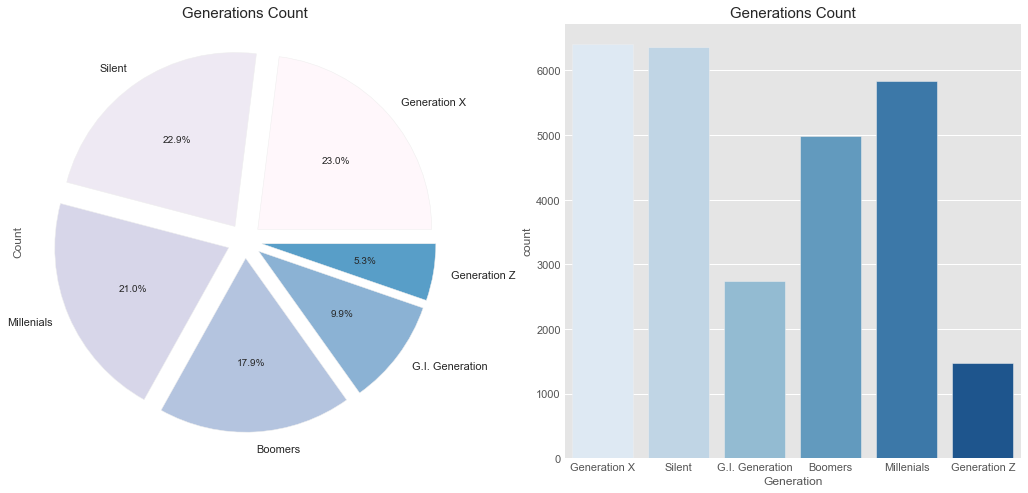

In [110]:
f,ax=plt.subplots(1,2,figsize=(18,8))
dataset['Generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],colors = color)
ax[0].set_title('Generations Count',size=15)
ax[0].set_ylabel('Count')
sns.countplot('Generation',data=dataset,ax=ax[1], palette='Blues')
ax[1].set_title('Generations Count',size=15)
plt.show()

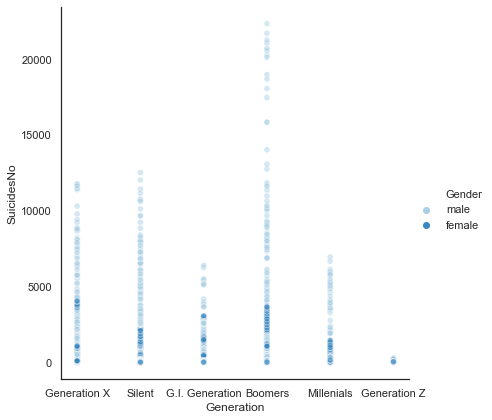

In [111]:
sns.set(style="white")
sns.relplot(x="Generation",y="SuicidesNo",hue="Gender",
            sizes=(40, 400), alpha=.5, palette="Blues",
            height=6, data=dataset)
plt.show()

### 5.2 Suicides100kPop

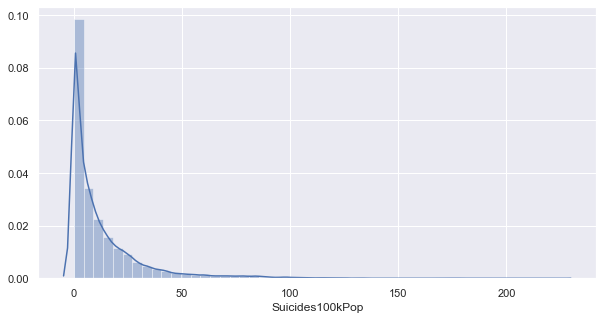

In [112]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(dataset['Suicides100kPop'])

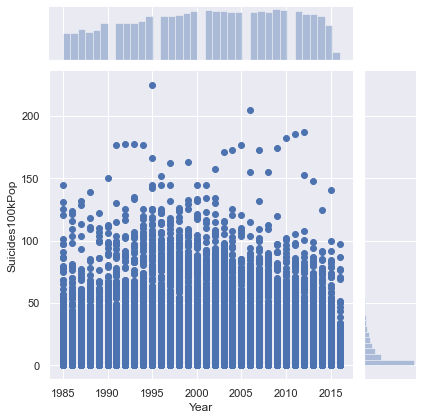

In [113]:
fig = sns.jointplot(y='Suicides100kPop',x='Year',data=dataset)
plt.show()

### Conclusion

Through applying the design principles of trustworthiness, accessibility and elegance, we trust that we have accurately demonstrated the prevalence and gravitas of suicide. We have supplemented the main dataset with a handful of datasets in an attempt to provide a fuller picture of the complex suicide situation. This report is packed with the explorations we have done and our rationale behind the decisions we made in creating the webpage.

We believe that we have tapped on data to illustrate the issue at hand, thereby not only increasing the awareness of suicides, but also informing the viewers of the warning signs and suggesting how they can help.

Life may not always be easy, but suicide is not a solution.
